In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from python_files.fetch_missing_data import fetch_missing_data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from python_files.data import GetData
from python_files.basic_preprocessing import BasicPreprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import datetime

# Clean the data

In [3]:
data = GetData().get_data()['AllMoviesDetailsCleaned']
data.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,belongs_to_collection
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,NaN,Villealfa Filmproduction Oy,Finland,...,suomi,Released,NaN,Ariel,7.1,40,2,1,2,NaN
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",NaN,Villealfa Filmproduction Oy,Finland,...,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3,NaN
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,NaN,Miramax Films,United States of America,...,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1,NaN
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",NaN,Universal Pictures,Japan,...,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1,NaN
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,NaN,inLoops,Austria,...,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5,NaN


In [4]:
data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number',
       'belongs_to_collection'],
      dtype='object')

In [5]:
data.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
count,329074.000000,3.290740e+05,4299.000000,3.290740e+05,292282.000000,329074.000000,329074.000000,329074.000000,329074.000000,329074.000000
mean,252968.854899,8.683204e+05,19.862385,2.236717e+06,60.410877,2.391715,28.757714,0.594942,0.609993,0.647669
std,138638.645851,7.926402e+06,22.166717,2.788750e+07,142.495658,3.134253,327.754144,1.038569,0.665176,0.672060
min,2.000000,0.000000e+00,0.600000,-1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124756.750000,0.000000e+00,10.097500,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276456.500000,0.000000e+00,14.922000,0.000000e+00,71.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,370829.750000,0.000000e+00,22.589500,0.000000e+00,94.000000,5.500000,1.000000,1.000000,1.000000,1.000000
max,469219.000000,6.000000e+08,696.244000,2.920357e+09,51420.000000,10.000000,27803.000000,26.000000,26.000000,25.000000


In [6]:
data.shape

(329074, 23)

In [7]:
df = BasicPreprocessing.apply(data)
df.head()

,id,budget,genres,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,collection
2,5,4000000,Crime|Comedy,en,Four Rooms,Miramax Films,United States of America,25/12/1995,4300000,98.0,Four Rooms,6.5,485,2,1,1,1
5,9,4000000,Drama,de,Sonntag im August,none,Germany,2/9/2004,4257354,15.0,Sunday in August,5.7,2256,0,1,1,1
6,11,11000000,Adventure|Action|Science Fiction,en,Star Wars,Lucasfilm,United States of America,25/05/1977,775398007,121.0,Star Wars,8.0,6168,2,1,1,1
7,12,94000000,Animation|Family,en,Finding Nemo,Pixar Animation Studios,United States of America,30/05/2003,940335536,100.0,Finding Nemo,7.6,5531,1,1,1,1
8,13,55000000,Comedy|Drama|Romance,en,Forrest Gump,Paramount Pictures,United States of America,6/7/1994,677945399,142.0,Forrest Gump,8.2,7204,1,1,1,1


In [8]:
df.shape

(8628, 17)

In [9]:
df.columns

Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number', 'collection'],
      dtype='object')

In [10]:
df.shape

(8628, 17)

In [11]:
df.columns

Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number', 'collection'],
      dtype='object')

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,8628.0,4.669261e+04,8.163424e+04,5.0,9476.750,1.719800e+04,36492.25,4.689380e+05
budget,8628.0,2.916749e+07,3.696269e+07,310000.0,5500000.000,1.600000e+07,38000000.00,3.800000e+08
revenue,8628.0,8.071537e+07,1.518270e+08,3003.0,7339295.250,2.772812e+07,88323487.00,2.920357e+09
runtime,8612.0,1.036396e+02,3.166709e+01,0.0,91.000,1.010000e+02,116.00,7.200000e+02
vote_average,8628.0,6.254296e+00,1.047981e+00,0.0,5.781,6.333500e+00,6.90,1.000000e+01
vote_count,8628.0,9.348144e+02,1.790422e+03,0.0,101.000,3.410000e+02,985.00,2.780300e+04
production_companies_number,8628.0,2.237135e+00,2.111498e+00,0.0,1.000,2.000000e+00,3.00,2.600000e+01
production_countries_number,8628.0,1.245480e+00,7.660098e-01,0.0,1.000,1.000000e+00,1.00,1.200000e+01
spoken_languages_number,8628.0,1.355586e+00,8.616517e-01,0.0,1.000,1.000000e+00,1.00,9.000000e+00
collection,8628.0,1.000000e+00,0.000000e+00,1.0,1.000,1.000000e+00,1.00,1.000000e+00


In [13]:
df.isnull().sum()/len(df)

id                             0.000000
budget                         0.000000
genres                         0.024223
original_language              0.000000
original_title                 0.000000
production_companies           0.000000
production_countries           0.000000
release_date                   0.000000
revenue                        0.000000
runtime                        0.001854
title                          0.000000
vote_average                   0.000000
vote_count                     0.000000
production_companies_number    0.000000
production_countries_number    0.000000
spoken_languages_number        0.000000
collection                     0.000000
dtype: float64

In [14]:
(df['runtime']==0).value_counts()

False    8451
True      177
Name: runtime, dtype: int64

In [15]:
(df['production_companies_number']==0).value_counts()

False    7274
True     1354
Name: production_companies_number, dtype: int64

In [16]:
(df['production_countries_number']==0).value_counts()

False    8126
True      502
Name: production_countries_number, dtype: int64

In [17]:
(df['spoken_languages_number']==0).value_counts()

False    8337
True      291
Name: spoken_languages_number, dtype: int64

# Missing data

* **runtime:** nan = 0, plus 0 value, impute with mean.
* **production_companies_number 0 value:** impute with most frequent.
* **production_countries_number 0 value:** impute with most frerquent.
* **spoken_languages_number:** impute with most frequent.

In [18]:
df['genres'].value_counts()

Drama                                        650
Comedy                                       629
Drama|Romance                                265
Comedy|Drama                                 209
Comedy|Romance                               192
                                            ... 
Drama|War|Romance                              1
Drama|History|Mystery                          1
Adventure|Animation|Drama                      1
Horror|Mystery|Science Fiction|Thriller        1
Action|Animation|Adventure|Family|Romance      1
Name: genres, Length: 1663, dtype: int64

In [19]:
df['runtime'].sort_values(ascending=True)

3982      0.0
11536     0.0
93542     0.0
11821     0.0
11870     0.0
         ... 
305377    NaN
312143    NaN
313707    NaN
318855    NaN
327312    NaN
Name: runtime, Length: 8628, dtype: float64

### Features

* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

# Scaling analysis

 

['budget','runtime',
'vote_average',
'vote_count', 'production_companies_number',
'production_countries_number', 'spoken_languages_number']


<AxesSubplot:xlabel='spoken_languages_number', ylabel='Count'>

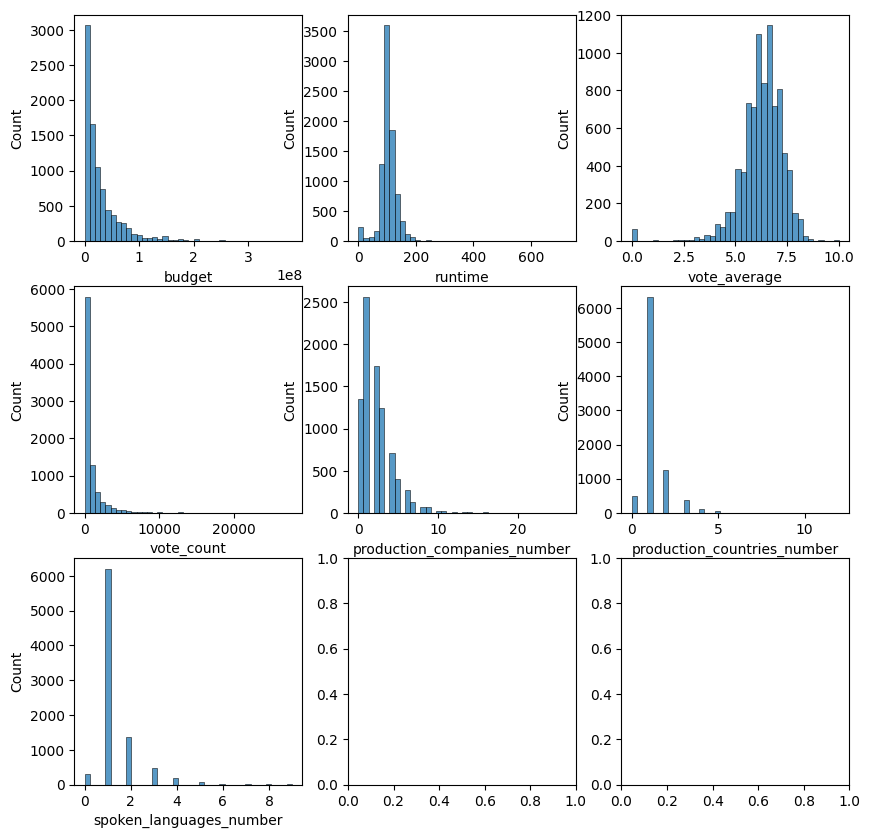

In [20]:
# Check distribution of data
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

sns.histplot(df['budget'], bins=40, ax=axs[0,0])
sns.histplot(df['runtime'], bins=40, ax=axs[0,1])
sns.histplot(df['vote_average'], bins=40, ax=axs[0,2])
sns.histplot(df['vote_count'], bins=40, ax=axs[1,0])
sns.histplot(df['production_companies_number'], bins=40, ax=axs[1,1])
sns.histplot(df['production_countries_number'], bins=40, ax=axs[1,2])
sns.histplot(df['spoken_languages_number'], bins=40, ax=axs[2,0])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

<AxesSubplot:xlabel='spoken_languages_number'>

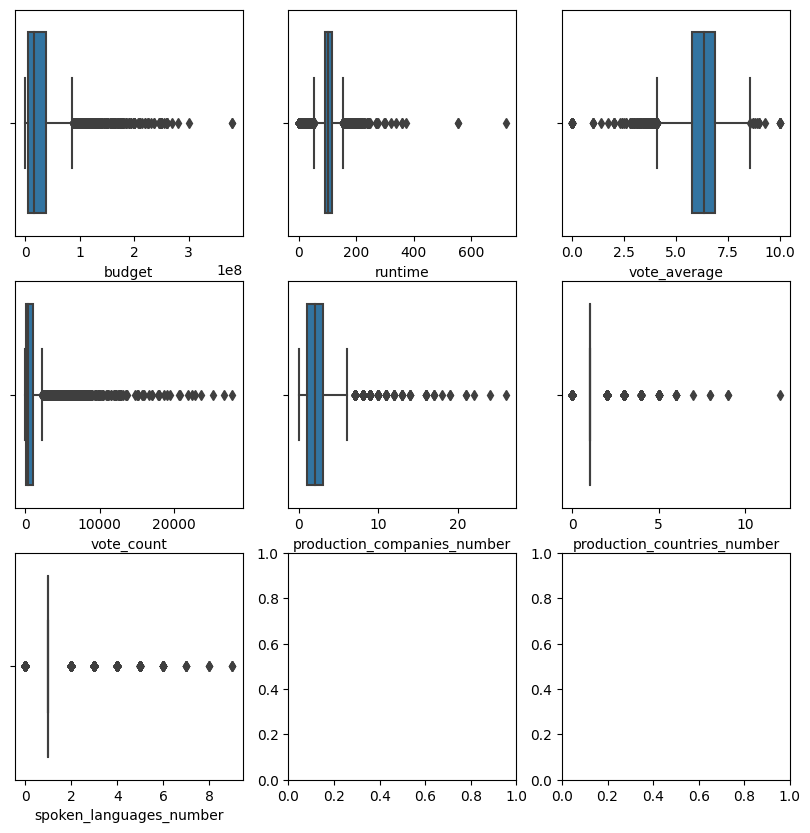

In [21]:
# Check outlier of data
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

sns.boxplot(df['budget'], ax=axs[0,0])
sns.boxplot(df['runtime'], ax=axs[0,1])
sns.boxplot(df['vote_average'], ax=axs[0,2])
sns.boxplot(df['vote_count'], ax=axs[1,0])
sns.boxplot(df['production_companies_number'], ax=axs[1,1])
sns.boxplot(df['production_countries_number'], ax=axs[1,2])
sns.boxplot(df['spoken_languages_number'], ax=axs[2,0])

In [22]:
# Define function to Standardization scaling

def Standardization_scaling(data_feature):
    sd_scaler = StandardScaler()
    sd_scaler.fit(data_feature)
    return sd_scaler.transform(data_feature)
    
df['budget_sd_scal'] = Standardization_scaling(df[['budget']])

In [23]:
df[['budget_sd_scal']]

,budget_sd_scal
2,-0.680928
5,-0.680928
6,-0.491537
7,1.754101
8,0.698921
...,...
318954,0.698921
324095,-0.621406
327312,-0.193923
327522,-0.569999


In [24]:
# Define function to MinMax scaling

def MinMax_scaling(data_feature):
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(data_feature)
    return mm_scaler.transform(data_feature)
    
df['budget_mm_scal'] = MinMax_scaling(df[['budget']])

In [25]:
# Define function to Robust scaling

def Robust_scaling(data_feature):
    rb_scaler = RobustScaler()
    rb_scaler.fit(data_feature)
    return rb_scaler.transform(data_feature)
    
df['budget_rb_scal'] = Robust_scaling(df[['budget']])

In [26]:
df['budget_rb_scal'] = Robust_scaling(df[['budget']])

<AxesSubplot:xlabel='budget_rb_scal', ylabel='Count'>

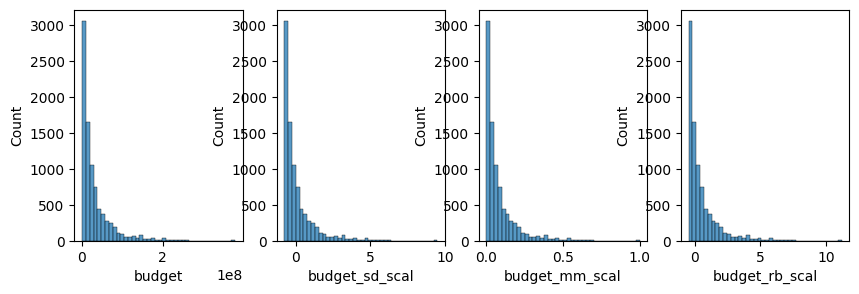

In [27]:
# Compare scaling result of "budget"
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

sns.histplot(df['budget'], bins=40, ax=axs[0])
sns.histplot(df['budget_sd_scal'], bins=40, ax=axs[1])
sns.histplot(df['budget_mm_scal'], bins=40, ax=axs[2])
sns.histplot(df['budget_rb_scal'], bins=40, ax=axs[3])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

<AxesSubplot:xlabel='budget_rb_scal'>

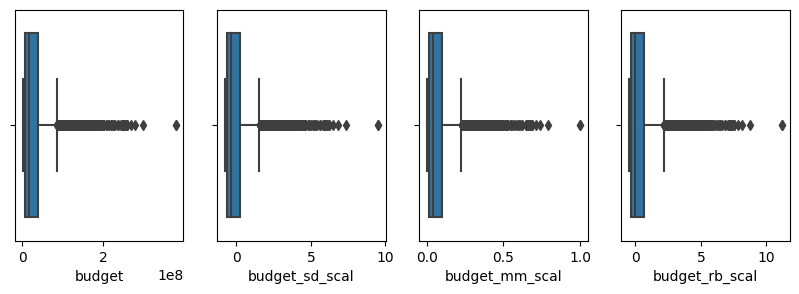

In [28]:
# Compare outlier scaling result of "budget"

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

sns.boxplot(df['budget'], ax=axs[0])
sns.boxplot(df['budget_sd_scal'], ax=axs[1])
sns.boxplot(df['budget_mm_scal'], ax=axs[2])
sns.boxplot(df['budget_rb_scal'], ax=axs[3])


In [29]:
# Apply log feature to budget and revnue
df['budget_log'] = np.log(df['budget'])
df['revenue_log'] = np.log(df['revenue'])

In [30]:
# Scaling of log budget
df['budget_log_sd_scal'] = Standardization_scaling(df[['budget_log']])
df['budget_log_mm_scal'] = MinMax_scaling(df[['budget_log']])
df['budget_log_rb_scal'] = Robust_scaling(df[['budget_log']])

<AxesSubplot:xlabel='budget_log_rb_scal', ylabel='Count'>

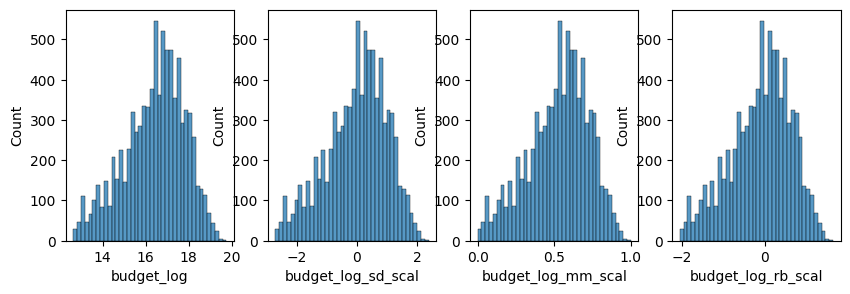

In [31]:
# Compare scaling result of "budget"
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

sns.histplot(df['budget_log'], bins=40, ax=axs[0])
sns.histplot(df['budget_log_sd_scal'], bins=40, ax=axs[1])
sns.histplot(df['budget_log_mm_scal'], bins=40, ax=axs[2])
sns.histplot(df['budget_log_rb_scal'], bins=40, ax=axs[3])


/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

<AxesSubplot:xlabel='budget_log_rb_scal'>

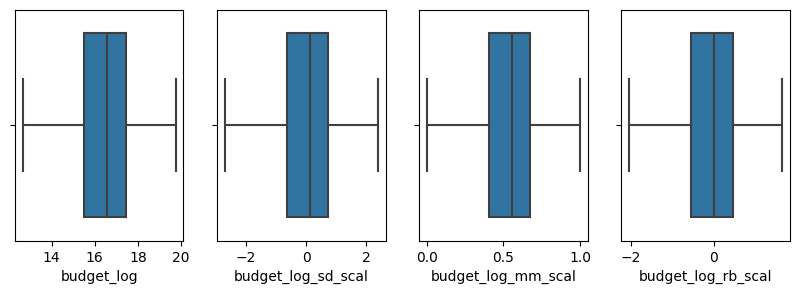

In [32]:
# Compare outlier result of "budget log"
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

sns.boxplot(df['budget_log'], ax=axs[0])
sns.boxplot(df['budget_log_sd_scal'], ax=axs[1])
sns.boxplot(df['budget_log_mm_scal'], ax=axs[2])
sns.boxplot(df['budget_log_rb_scal'], ax=axs[3])

In [33]:
df['production_companies_number_log'] = np.log(df['production_companies_number'])

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_companies_number_log'>

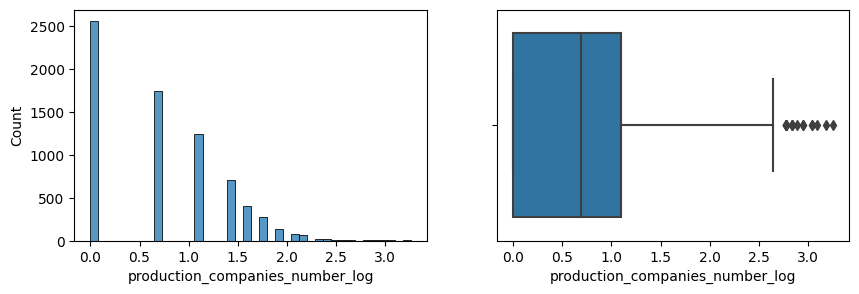

In [34]:
# Check "production_companies_number_log"
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

sns.histplot(df['production_companies_number_log'], bins=40, ax=axs[0])
sns.boxplot(df['production_companies_number_log'], ax=axs[1])

In [35]:
# Scaling of log budget
df['production_companies_number_sd_scal'] = Standardization_scaling(df[['production_companies_number']])
df['production_companies_number_mm_scal'] = MinMax_scaling(df[['production_companies_number']])
df['production_companies_number_rb_scal'] = Robust_scaling(df[['production_companies_number']])

<AxesSubplot:xlabel='production_companies_number_rb_scal', ylabel='Count'>

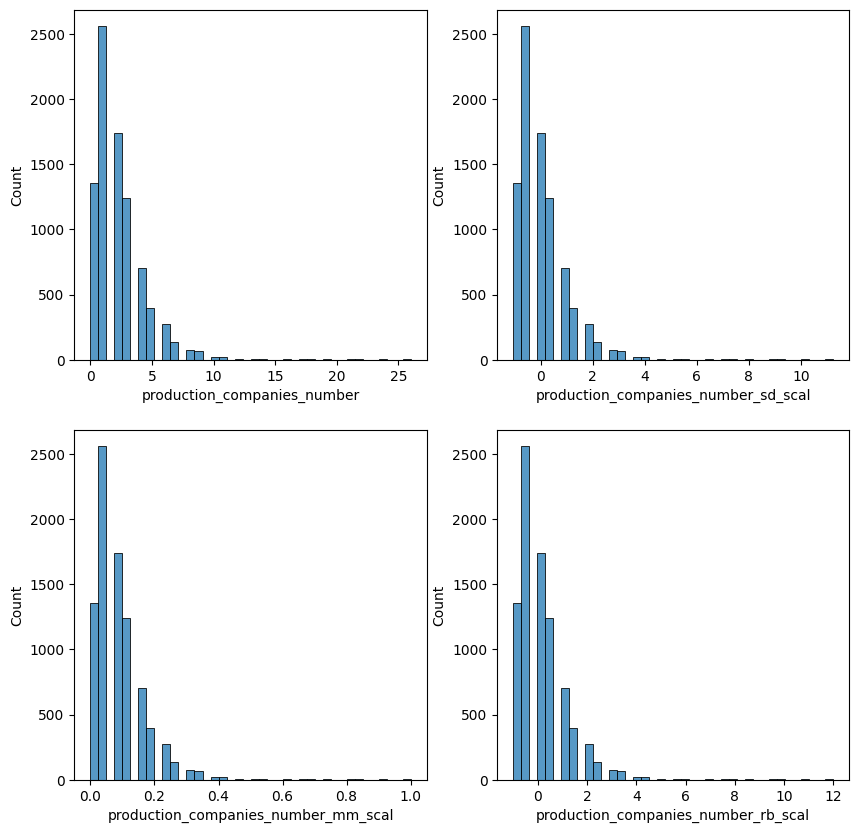

In [36]:
# Compare scaling result of "production_companies_number"
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.histplot(df['production_companies_number'], bins=40, ax=axs[0,0])
sns.histplot(df['production_companies_number_sd_scal'], bins=40, ax=axs[0,1])
sns.histplot(df['production_companies_number_mm_scal'], bins=40, ax=axs[1,0])
sns.histplot(df['production_companies_number_rb_scal'], bins=40, ax=axs[1,1])

# Revenue

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue_log'>

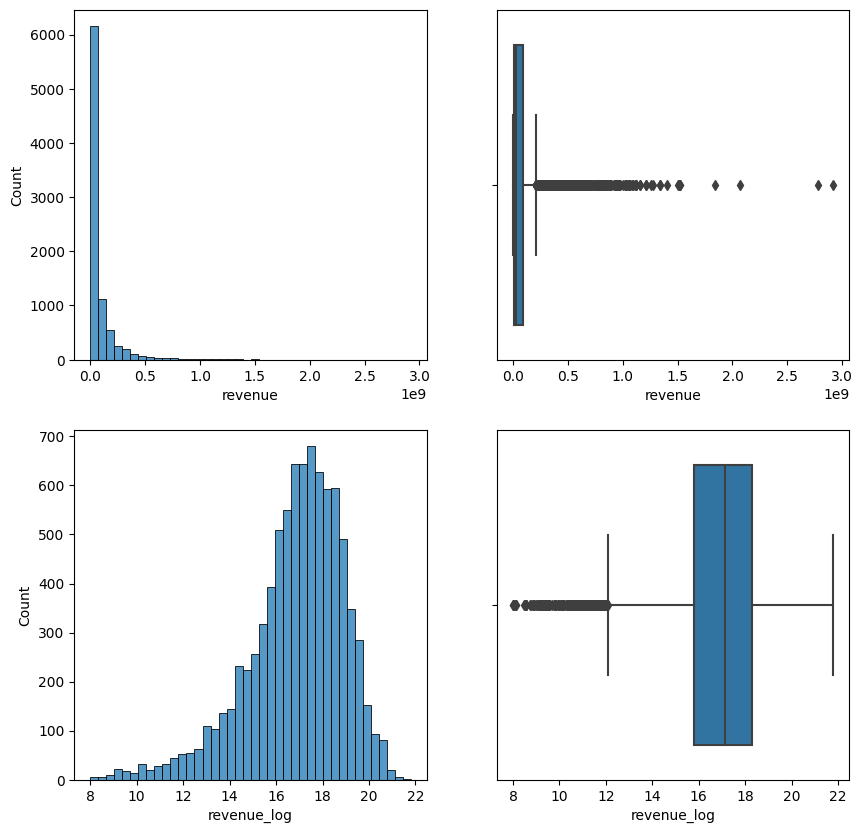

In [37]:
# Check "revenue"
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.histplot(df['revenue'], bins=40, ax=axs[0,0])
sns.boxplot(df['revenue'], ax=axs[0,1])
sns.histplot(df['revenue_log'], bins=40, ax=axs[1,0])
sns.boxplot(df['revenue_log'], ax=axs[1,1])


In [38]:
# Drop out revenue log outlier
df_revenue_log_clean = df[(df['revenue_log'] > 12.6)] 

/home/abeljiang2/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue_log'>

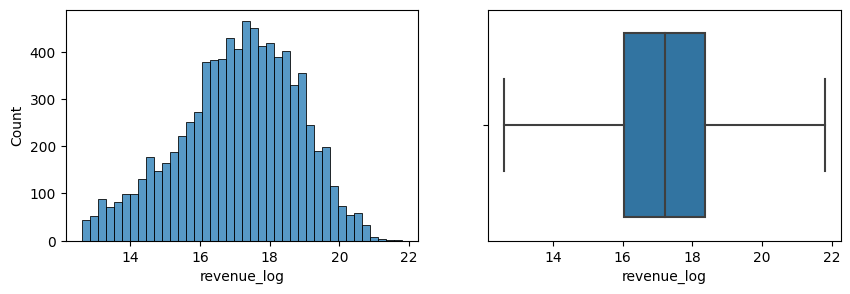

In [39]:
# Check "revenue"
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

sns.histplot(df_revenue_log_clean['revenue_log'], bins=40, ax=axs[0])
sns.boxplot(df_revenue_log_clean['revenue_log'], ax=axs[1])

In [40]:
df_revenue_log_clean.shape

(8274, 29)

In [41]:
df.shape

(8628, 29)

# Map inflation data

In [42]:
df.dtypes

id                                       int64
budget                                   int64
genres                                  object
original_language                       object
original_title                          object
production_companies                    object
production_countries                    object
release_date                            object
revenue                                  int64
runtime                                float64
title                                   object
vote_average                           float64
vote_count                               int64
production_companies_number              int64
production_countries_number              int64
spoken_languages_number                  int64
collection                               int64
budget_sd_scal                         float64
budget_mm_scal                         float64
budget_rb_scal                         float64
budget_log                             float64
revenue_log  

In [43]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '25/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '25/05/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '30/05/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '15/09/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '30/04/1941' in DD/MM/YYYY for

/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '25/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '16/07/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '27/09/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '26/11/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])
/tmp/ipykernel_6843/3555043957.py:2: UserWarning: Parsing '19/06/1980' in DD/MM/YYYY for

In [47]:
df.dtypes

id                                              int64
budget                                          int64
genres                                         object
original_language                              object
original_title                                 object
production_companies                           object
production_countries                           object
release_date                           datetime64[ns]
revenue                                         int64
runtime                                       float64
title                                          object
vote_average                                  float64
vote_count                                      int64
production_companies_number                     int64
production_countries_number                     int64
spoken_languages_number                         int64
collection                                      int64
budget_sd_scal                                float64
budget_mm_scal              

In [50]:
df['release_year'] = df['release_date'].dt.year

In [56]:
df[['release_year']]

,release_year
2,1995
5,2004
6,1977
7,2003
8,1994
...,...
318954,1978
324095,1998
327312,2013
327522,2017


In [59]:
infl = pd.read_csv('../data/inflation.csv')

In [60]:
infl

,release_year,inflation_rate,present value
0,1981,12.47,88.911324
1,1982,10.24,80.652311
2,1983,8.77,74.148627
3,1984,8.12,68.582221
4,1985,6.86,64.181421
5,1986,5.82,60.649975
6,1987,5.76,57.348717
7,1988,7.15,53.523850
8,1989,7.00,50.022714
9,1990,8.13,46.262748


In [66]:
df = df.join(infl, how='outer', on='release_year', lsuffix='_left', rsuffix='_right')

In [68]:
df[['release_year','inflation_rate']]

,release_year,inflation_rate
2.0,1995,NaN
24.0,1995,NaN
25.0,1995,NaN
33.0,1995,NaN
45.0,1995,NaN
...,...,...
NaN,36,2.19
NaN,37,2.44
NaN,38,2.19
NaN,39,1.92


In [78]:
df = df.drop(columns = ['release_year_left','release_year_right'])

In [79]:
df.columns

Index(['release_year', 'id', 'budget', 'genres', 'original_language',
       'original_title', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number', 'collection',
       'budget_sd_scal', 'budget_mm_scal', 'budget_rb_scal', 'budget_log',
       'revenue_log', 'budget_log_sd_scal', 'budget_log_mm_scal',
       'budget_log_rb_scal', 'production_companies_number_log',
       'production_companies_number_sd_scal',
       'production_companies_number_mm_scal',
       'production_companies_number_rb_scal', 'inflation_rate',
       'present value'],
      dtype='object')

In [80]:
df.isnull().sum()

release_year                              0
id                                       41
budget                                   41
genres                                  250
original_language                        41
original_title                           41
production_companies                     41
production_countries                     41
release_date                             41
revenue                                  41
runtime                                  57
title                                    41
vote_average                             41
vote_count                               41
production_companies_number              41
production_countries_number              41
spoken_languages_number                  41
collection                               41
budget_sd_scal                           41
budget_mm_scal                           41
budget_rb_scal                           41
budget_log                               41
revenue_log                     